In [ ]:
import bamcensus

# plotting dependencies, assumed at least to have matplotlib
from matplotlib import pyplot as plt

try:
    import contextily as ctx
except Exception:
    pass

In [2]:
# collect all LODES jobs for 2020 by tract for Jefferson and Ouray counties in Colorado
# 1. queries the ACS API for tracts=* in counties 08059,08091
# 2. aggregates the count by sum and geocode id of rows to the tract level
# 3. downloads the Colorado TIGER/Lines shapefile for census tracts in Colorado
# 4. combines the result
df = bamcensus.run_acs_tiger(year=2020, geoids="08059,08091", wildcard='"census_tract"')

['wac_tiger']


AttributeError: module 'bamcensus_app_py' has no attribute 'run_acs_tiger_python'

In [9]:
df.acs_value.sum()

580519

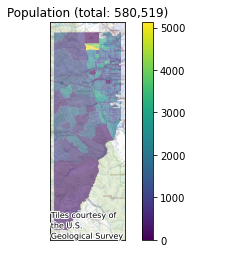

In [13]:
fig, ax = plt.subplots()
df.to_crs("EPSG:3857").plot("acs_value", legend=True, alpha=0.6, ax=ax)
tot = df["acs_value"].sum()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Population (total: {int(df.value.sum()):,})")
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)
fig.savefig("co-jeffco-pop.png", dpi=300)